# Project 1

[This dataset](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Proj1.csv) is adapted from the World Health Organization on Strokes (it's based on real data but is NOT REAL). Use this dataset to answer the following questions and perform the following tasks. Feel free to add extra cells as needed, but follow the structure listed here and clearly identify where each question is answered. Please remove any superflous code.

## Data Information

- `reg_to_vote`: 0 if no, 1 if yes.
- `age`: age of the patient in years.
- `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
- `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
- `ever_married`: 0 if no, 1 if yes.
- `Residence_type`: 0 for Rural, 1 for Urban.
- `avg_glucose_level`: average glucose level in blood.
- `bmi`: body mass index.
- `smoking_status_smokes`, `smoking_status_formerly`: Whether or not the person smokes, or formerly smoked. If a person has 0's for both these columns, they never smoked.
- `stroke`: 1 if the patient had a stroke or 0 if not.
- `dog_owner`: 0 if no, 1 if yes.
- `er_visits`: number of recorded Emergency Room visits in lifetime.
- `racoons_to_fight`: number of racoons the patient belives they could fight off at once.
- `fast_food_budget_month`: amount (in US dollars) spent on fast food per month.


## Part I: Logistic Regression
Build a logistic regression model to predict whether or not someone had a stroke based on **all** the other variables in the dataset.

1. Count the missing data per column, and remove rows with missing data (if any).
2. Use 10 fold cross validation for your model validation. Store both the train and test accuracies to check for overfitting. **Is the model overfit? How can you tell?** Z-score your continuous variables only.
3. After completing steps 1-2, fit another logistic regression model on ALL of the data (no model validation) using the same predictors as before, and put the coefficients into a dataframe called `coef`.
4. Print out a confusion matrix for the model you made in part 3. **What does this confusion matrix tell you about your model? How can you tell?**

## Part II: Data Exploration
The WHO has asked the following five questions, create **at least 1 ggplot graph** (using the above data + model when needed) to help answer each question, and **explicitly answer the question in a Markdown cell** below your graph. You may use other calculations to help support your answer but MUST pair it with a graph. Write your answer as if you were explaining it to a non-data scientist. You will be graded on the effectiveness and clarity of your graph, as well as the completeness, clarity, and correctness of your responses and justifications.

1. Do dog-owners over 50 have a higher probability of stroke than non-dog owners who currently smoke? How can you tell?
2. What is the relationship between average blood glucose and BMI? Is the relationship between those two variables different for people who are and are not registered to vote? How can you tell?
3. Is your logistic regression model most accurate for people who make less than 30k, between 30-90k, or over 100k? Discuss the potential accuracy *and* ethical implications if your model *were* more accurate for different groups (you can use the full model from part I-3 to check accuracy).
4. Which of the following variables is the strongest predictor of having a stroke (owning a dog, residence type, marriage, being registered to vote)? How were you able to tell?
5. Create a variable `er_visits_per_year` that calculates the # of visits to the ER that a person has had per year of life. Store this variable in your data frame (no need to include this variable in the previous logistic regression model). Is the # of ER visits per year different for stroke and non-stroke patients? How can you tell?

# PART I

In [35]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix


from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

In [8]:
# importing data
strokesDF = pd.read_csv("/Users/iman/CPSC_Courses/CPSC392ParlettPelleriti/Data/Proj1.csv")
strokesDF.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_smokes,smoking_status_formerly,reg_to_vote,dog_owner,raccoons_to_fight,fast_food_budget_month,income_in_k,er_visits
0,60.0,1.0,0.0,0.0,1.0,73.00,25.2,0,1,0,1.0,1.0,10.0,209.19,51.553645,9.0
1,4.0,0.0,0.0,0.0,0.0,110.15,17.1,0,0,0,0.0,1.0,13.0,176.46,45.405414,5.0
2,77.0,0.0,0.0,1.0,1.0,68.38,27.8,0,0,0,0.0,1.0,6.0,213.00,94.865174,8.0
3,37.0,0.0,0.0,1.0,1.0,95.08,30.1,0,0,0,1.0,1.0,12.0,161.90,84.123775,8.0
4,44.0,0.0,0.0,0.0,0.0,103.78,40.9,0,1,0,1.0,1.0,11.0,261.29,74.794596,11.0


## 1. Count the missing data per column, and remove rows with missing data (if any).

In [10]:
# count missing data per column
strokesDF.isnull().sum(axis = 0)

age                         13
hypertension                12
heart_disease               21
ever_married                 9
Residence_type              21
avg_glucose_level           31
bmi                        575
stroke                       0
smoking_status_smokes        0
smoking_status_formerly      0
reg_to_vote                 14
dog_owner                   21
raccoons_to_fight           27
fast_food_budget_month       8
income_in_k                 21
er_visits                   15
dtype: int64

In [11]:
strokesDF = strokesDF.dropna() # drop missing values
strokesDF.isnull().sum(axis = 0) # count missing data per column again

age                        0
hypertension               0
heart_disease              0
ever_married               0
Residence_type             0
avg_glucose_level          0
bmi                        0
stroke                     0
smoking_status_smokes      0
smoking_status_formerly    0
reg_to_vote                0
dog_owner                  0
raccoons_to_fight          0
fast_food_budget_month     0
income_in_k                0
er_visits                  0
dtype: int64

## 2. Use 10 fold cross validation for your model validation. Store both the train and test accuracies to check for overfitting. Is the model overfit? How can you tell? Z-score your continuous variables only.

In [15]:

# predictor values
strokePredictors = ["age", "hypertension", "heart_disease", "ever_married", "Residence_type",
                   "avg_glucose_level", "bmi", "smoking_status_smokes", "smoking_status_formerly", "reg_to_vote",
                   "dog_owner", "raccoons_to_fight", "fast_food_budget_month", "income_in_k", "er_visits"]

# store predictors and outcomes in X and y variables
X = strokesDF[strokePredictors]
y = strokesDF["stroke"]

# kfold, unlike train test split, allows us to take advantage of all of the data at some point or 
    # another bc we're actually training k different models and looking at the performance of the 
    # train and test set on all of those different models
# create empty kfold object
# set argument n_splits to be 10
    # this is so it can use 90% of our data
kf = KFold(n_splits = 10)

# create empty lists to store accuracy for each fold of training and test sset
accTrain = []
accTest = []

#create model
lr = LogisticRegression()

In [20]:
#for loop that will loop through each of the models we will create
#the train and test that are referenced in the for loop are the indices of the rows that are going 
    # to be our training set and the rows that will be in our testing set respecively
for train,test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y.iloc[train]
    y_test  = y.iloc[test]
    
    # list of continuous predictor values
    contStrokePredictors = ["age", "avg_glucose_level", "bmi", "fast_food_budget_month", "income_in_k", "er_visits"]

    #now we have train and test set 
    #preprocessing by z-scoring
    #avoid data leakage bc if we z-score incorrectly, it can cause info from test set to leak into model
    zscore = StandardScaler()

    # ONLY FIT ON TRAINING SET
    #.fit just calculates mean and standard deviations 
    # transform train and test set to get the actual z-score 
    Xz_train = zscore.fit_transform(X_train[contStrokePredictors])
    Xz_test = zscore.transform(X_test[contStrokePredictors])

    X_train[contStrokePredictors] = Xz_train
    X_test[contStrokePredictors] = Xz_test
    
    # create model
    lr.fit(X_train, y_train)

    # record accuracy
    # will append mse and r2 for the test set in our list above
    accTrain.append(accuracy_score(y_train, lr.predict(X_train)))
    accTest.append(accuracy_score(y_test, lr.predict(X_test)))

In [102]:
print(accTrain)
print()
print("Train Mean Accuracy Score", np.mean(accTrain))
print()
print(accTest)
print()
print("Test Mean Accuracy Score", np.mean(accTest))

[0.9620520028109627, 0.9501054111033029, 0.9556962025316456, 0.9690576652601969, 0.9613220815752461, 0.9634317862165963, 0.9556962025316456, 0.9528832630098453, 0.9655414908579466, 0.9669479606188467, 0.9603093991718104, 0.9613251035237128, 0.96109375, 0.9596875, 0.9603125, 0.959921875, 0.961171875, 0.961015625, 0.95984375, 0.959765625]

Train Mean Accuracy Score 0.960359053460588

[0.9603093991718104, 0.9613251035237128, 0.96109375, 0.9596875, 0.9603125, 0.959921875, 0.961171875, 0.961015625, 0.95984375, 0.959765625, 0.9620520028109627, 0.9501054111033029, 0.9556962025316456, 0.9690576652601969, 0.9613220815752461, 0.9634317862165963, 0.9556962025316456, 0.9528832630098453, 0.9655414908579466, 0.9669479606188467]

Test Mean Accuracy Score 0.9603590534605878


### Is the model overfit? How can you tell? Z-score your continuous variables only.
The accuracy score determines whether the predicted category from the model match the actual category form the data. Looking at the accuracy scores for the train and test sets, our model is doing really well, meaning that our model is doing really well in predicting the actual category from the data. Since both the train and test accuracy mean scores are very closely related (0.960359053460588 and 0.9603590534605878 respectively), there is almost no overfitting. If there was overfitting, the train test would proably have a higher score than the test set, meaning that the model is too atuned to the training set's data and is not equipped to accurately oredict values for unseen data.

In [29]:
# everything is z-scored except for key non-continuous variables
X_train

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_smokes,smoking_status_formerly,reg_to_vote,dog_owner,raccoons_to_fight,fast_food_budget_month,income_in_k,er_visits
0,0.752306,1.0,0.0,0.0,1.0,-0.730410,-0.459041,1,0,1.0,1.0,10.0,0.250219,-0.752716,-0.017618
1,-1.710520,0.0,0.0,0.0,0.0,0.090982,-1.476464,0,0,0.0,1.0,13.0,-0.546273,-1.000321,-0.863810
2,1.499949,0.0,0.0,1.0,1.0,-0.832558,-0.132461,0,0,0.0,1.0,6.0,0.342936,0.991552,-0.229166
3,-0.259212,0.0,0.0,1.0,1.0,-0.242218,0.156437,0,0,1.0,1.0,12.0,-0.900594,0.558968,-0.229166
4,0.048641,0.0,0.0,0.0,0.0,-0.049859,1.513000,1,0,1.0,1.0,11.0,1.518085,0.183258,0.405478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13485,-0.083296,0.0,0.0,1.0,1.0,0.125474,2.568105,0,0,0.0,0.0,16.0,0.776347,0.036841,-0.229166
13486,0.576390,0.0,0.0,1.0,1.0,-0.201314,-0.484163,0,0,1.0,1.0,13.0,1.486693,-0.524462,1.463218
13487,-1.754499,0.0,0.0,0.0,1.0,-0.104693,-1.262931,0,0,1.0,1.0,10.0,0.359728,-0.911141,-0.652262
13488,-1.578583,0.0,0.0,0.0,0.0,-0.687074,-1.112201,0,0,0.0,0.0,6.0,-0.137198,0.199456,-0.863810


In [30]:
# everything is z-scored except for key non-continuous variables
X_test

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_smokes,smoking_status_formerly,reg_to_vote,dog_owner,raccoons_to_fight,fast_food_budget_month,income_in_k,er_visits
13490,-1.710520,0.0,0.0,0.0,1.0,-0.261011,-1.865848,0,0,1.0,1.0,13.0,-0.702019,0.067695,-0.229166
13491,-1.754499,0.0,0.0,0.0,0.0,-0.622733,-1.325734,0,0,0.0,0.0,10.0,-0.408293,0.696992,-0.652262
13492,-1.314709,0.0,0.0,0.0,0.0,-0.945762,-0.710257,1,1,0.0,0.0,7.0,1.069343,-0.391328,1.886314
13493,-1.446646,0.0,0.0,0.0,0.0,0.243100,-1.401099,0,0,1.0,1.0,11.0,0.786081,0.268531,-0.652262
13494,1.236075,0.0,1.0,1.0,1.0,2.187687,-0.245508,0,1,1.0,1.0,7.0,-0.249627,0.480665,0.405478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.400473,1.0,0.0,0.0,1.0,0.004089,0.018268,0,0,0.0,0.0,1.0,-0.465724,0.184530,-0.017618
14996,0.576390,0.0,0.0,1.0,1.0,-0.947531,-0.295751,0,0,1.0,0.0,15.0,-1.345686,-0.723425,1.463218
14997,0.752306,1.0,0.0,1.0,0.0,-0.129014,-0.031975,0,0,0.0,1.0,17.0,-3.261843,0.893365,3.155602
14998,1.499949,0.0,0.0,1.0,0.0,-0.354537,0.395091,0,0,0.0,0.0,11.0,0.170643,-0.692770,-0.652262


## 3. After completing steps 1-2, fit another logistic regression model on ALL of the data (no model validation) using the same predictors as before, and put the coefficients into a dataframe called `coef`.

In [31]:
#create empty model for ALL of the data
overallStrokeModel = LogisticRegression()

#fit the model
overallStrokeModel.fit(X,y)

LogisticRegression()

In [33]:
#grab coefficeints and interecpt
coef = pd.DataFrame({"Predictor Name": strokePredictors, "Coefficient Value":overallStrokeModel.coef_[0]})
coef = coef.append({"Coefficient Value": overallStrokeModel.intercept_[0], 
               "Predictor Name": "intercept"}, ignore_index = True)
coef

#logistic regression coefficeints that we get straight out of the model are in terms of log odds 
#1 standard deviation increase in age is associated with a 1.623485 increase in the log odds of 
    # having a stroke

,Predictor Name,Coefficient Value
0,age,0.045867
1,hypertension,0.512277
2,heart_disease,0.553456
3,ever_married,-0.388625
4,Residence_type,-0.361953
5,avg_glucose_level,0.004101
6,bmi,-0.085566
7,smoking_status_smokes,0.121408
8,smoking_status_formerly,0.103228
9,reg_to_vote,-0.507664


In [40]:
# add a new colum to your dataframe coef that has the coefficients in terms of ODDS
coef["Odds"]=np.exp(coef["Coefficient Value"])
coef

,Predictor Name,Coefficient Value,Odds
0,age,0.045867,1.046935
1,hypertension,0.512277,1.669088
2,heart_disease,0.553456,1.739253
3,ever_married,-0.388625,0.677988
4,Residence_type,-0.361953,0.696315
5,avg_glucose_level,0.004101,1.004109
6,bmi,-0.085566,0.917993
7,smoking_status_smokes,0.121408,1.129086
8,smoking_status_formerly,0.103228,1.108744
9,reg_to_vote,-0.507664,0.601900


## 4. Print out a confusion matrix for the model you made in part 3. What does this confusion matrix tell you about your model? How can you tell?

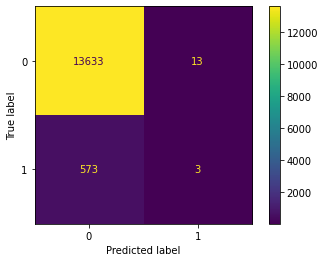

In [41]:
plot_confusion_matrix(overallStrokeModel, X, y) #confusion matrix

### What does this confusion matrix tell you about your model? How can you tell?
The confusion matrix tells us that the model is not performing too well, but also not too poorly. We can tell this because our model would be performing much better if it was making more accurate predictions when the predicted value is 1 (meaning the person has a stroke), and the true value would also be 1. Same goes for when predciting a person doesn't have a stroke, and correspondinly more of the true values of the predictions will also be 0 (a person doesn't have a stroke). However, when looking at the confusion matrix, we can see that the model can accurately predict for when a person doesn't have a strok, but is less accurate when it comes to predicting if a person has a stroke. For example, when predicting a person has a stroke, the model predicts 3 as the true values is a person has a stroke whereas it predicts 3 as the true value is a person doesn't have a stroke. This means that it is not too accurate when predicting if a person has a stroke.

# PART II

## 1. Do dog-owners over 50 have a higher probability of stroke than non-dog owners who currently smoke? How can you tell?

In [106]:
# create subset of strokesDF
stroke_subset= strokesDF[['age','dog_owner','smoking_status_smokes','stroke']]
stroke_subset.head()

,age,dog_owner,smoking_status_smokes,stroke
0,60.0,1.0,1,0
1,4.0,1.0,0,0
2,77.0,1.0,0,0
3,37.0,1.0,0,0
4,44.0,1.0,1,0


In [109]:
# store dog owners over the age of 50 in variable dog_owner
# find mean of dog owners over the age of 50 who have strokes to see proababilty
dog_owner = stroke_subset[(stroke_subset['age'] > 50) & (stroke_subset['dog_owner'] == 1.0)]['stroke'].mean()
dog_owner

0.08617290903970712

In [110]:
# store non-dog owners over the age of 50 in variable no_dog_owner
# find mean of non-dog owners who smoke who have strokes to see proababilty
no_dog_owner = stroke_subset[(stroke_subset['smoking_status_smokes'] == 1.0) & (stroke_subset['dog_owner'] == 0.0)]['stroke'].mean()
no_dog_owner

0.0387409200968523

In [112]:
dogOwnerPredictors = ["Dog Owners Over 50", "Non-Dog Owners Who Currently Smoke"]
dogOwnerPredictorsProb = [dog_owner, no_dog_owner]
dogToDF = {"Owning Dog": dogOwnerPredictors, 
    "Probability of Having a Stroke" : dogOwnerPredictorsProb}

#Creating a mean accuracy score data frame
dogDF = pd.DataFrame(dogToDF)
dogDF.head()

,Owning Dog,Probability of Having a Stroke
0,Dog Owners Over 50,0.086173
1,Non-Dog Owners Who Currently Smoke,0.038741


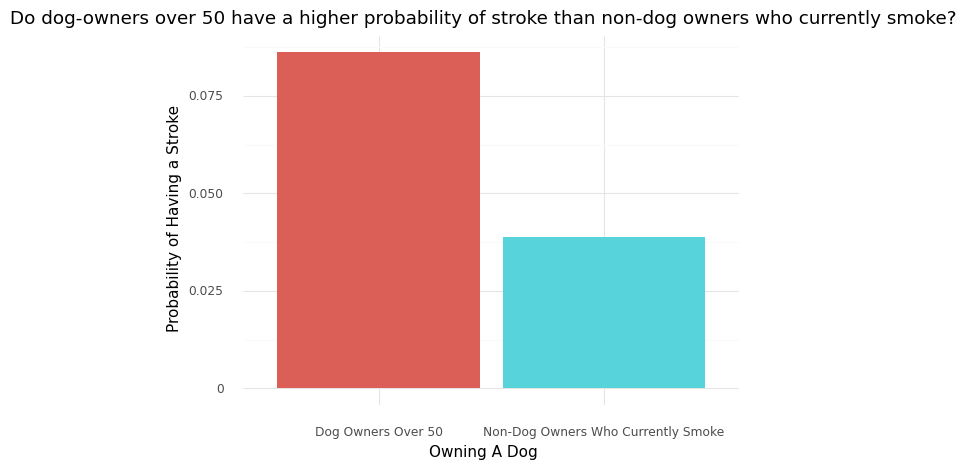

<ggplot: (8767942186245)>

In [113]:
(ggplot(dogDF, aes(x = "dogOwnerPredictors", y = "dogOwnerPredictorsProb", fill = "dogOwnerPredictors")) +
stat_summary(fun_data = "mean_sdl", geom = "bar") + theme_minimal() + xlab("Owning A Dog") + 
ylab("Probability of Having a Stroke") + 
ggtitle("Do dog-owners over 50 have a higher probability of stroke than non-dog owners who currently smoke?") + 
theme(legend_position = "none"))

### Do dog-owners over 50 have a higher probability of stroke than non-dog owners who currently smoke? How can you tell?
Looking at the gaph, we can tell that dog owners over 50 have a higher probabilty than non-dog owners who smoke because dog owners owners have a 0.0862 likliehood of getting a stroke, as opposed to non-dog owners who have a 0.0387 liklihood. 

## 2. What is the relationship between average blood glucose and BMI? Is the relationship between those two variables different for people who are and are not registered to vote? How can you tell?

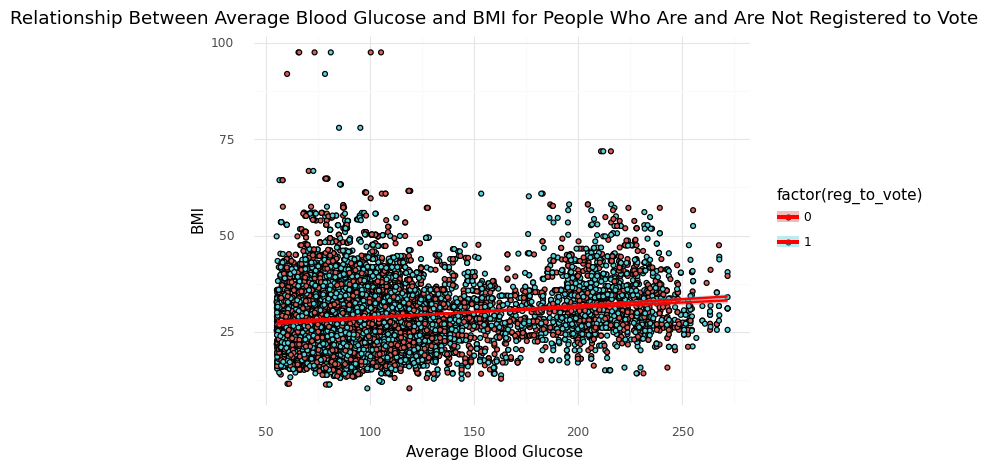

<ggplot: (8767972945205)>

In [103]:
(ggplot(strokesDF, aes(x = "avg_glucose_level", y = "bmi", fill = "factor(reg_to_vote)")) + 
geom_point()+ geom_smooth(method = "lm", color = "red")+ theme_minimal() + xlab("Average Blood Glucose") + 
ylab("BMI") + ggtitle("Relationship Between Average Blood Glucose and BMI for People Who Are and Are Not Registered to Vote"))

### What is the relationship between average blood glucose and BMI? Is the relationship between those two variables different for people who are and are not registered to vote? How can you tell?
There is almost no correlation between the average blood glucose and BMI because as the average blood glucose increases, the BMI is relatively constant. There is also no relationship between the poeple who are registered to vote compared to thse who are not registered to vote and their average blood glucose and BMI. There is no trend where people who are registered to vote have a stronger/weaker correlation between average blood glucose and BMI than those who are not registered to vote. We can tell because although there is clustering, this doesn't necessarily mean there is a relationship.

## 3. Is your logistic regression model most accurate for people who make less than 30k, between 30-90k, or over 100k? Discuss the potential accuracy *and* ethical implications if your model *were* more accurate for different groups (you can use the full model from part 1-3 to check accuracy).

In [79]:
incomeDF = strokesDF[["income_in_k", "stroke"]]
incomeDF.head()

,income_in_k,stroke
0,51.553645,0
1,45.405414,0
2,94.865174,0
3,84.123775,0
4,74.794596,0


In [81]:
pred = overallStrokeModel.predict(X) 
incomeDF["Predicted Values"] = pred
incomeDF.head()

,income_in_k,stroke,Predicted Values
0,51.553645,0,0
1,45.405414,0,0
2,94.865174,0,0
3,84.123775,0,0
4,74.794596,0,0


In [82]:
lessThanDF = incomeDF.loc[incomeDF["income_in_k"] < 30]
lessThanDF.head()

lessThanDFAcc = accuracy_score(lessThanDF["stroke"], lessThanDF["Predicted Values"])
print(lessThanDFAcc)

betweenDF = incomeDF.loc[(incomeDF["income_in_k"] >= 30) & (incomeDF["income_in_k"] <= 90)]
betweenDF.head()

betweenDFAcc = accuracy_score(betweenDF["stroke"], betweenDF["Predicted Values"])
print(betweenDFAcc)

greaterThanDFAcc = incomeDF.loc[incomeDF["income_in_k"] > 100]
greaterThanDFAcc.head()

greaterThanDFAcc = accuracy_score(greaterThanDFAcc["stroke"], greaterThanDFAcc["Predicted Values"])
print(greaterThanDFAcc)

0.9957805907172996
0.9597872148588946
0.9480369515011547


In [93]:
incomePredictors = ["< 30K", "30K-90K", "> 100K"]
incomePredictorsAcc = [lessThanDFAcc, betweenDFAcc, greaterThanDFAcc]
incomeToDF = {"Income Predictors": incomePredictors, 
    "Income Predictors Accuracy Score Mean" : incomePredictorsAcc}

#Creating a mean accuracy score data frame
DF = pd.DataFrame(incomeToDF)
DF.head()

,Income Predictors,Income Predictors Accuracy Score Mean
0,< 30K,0.995781
1,30K-90K,0.959787
2,> 100K,0.948037


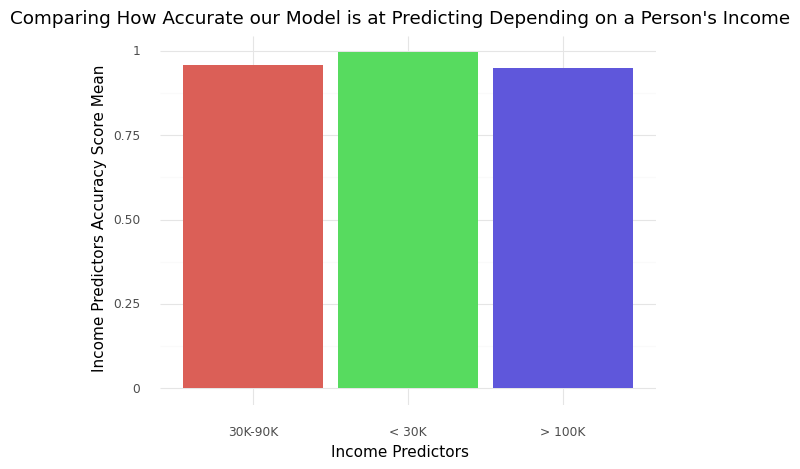

<ggplot: (8767946381153)>

In [94]:
(ggplot(DF, aes(x = "incomePredictors", y = "incomePredictorsAcc", fill = "incomePredictors")) +
stat_summary(fun_data = "mean_sdl", geom = "bar") + theme_minimal() + xlab("Income Predictors") + 
ylab("Income Predictors Accuracy Score Mean") + 
ggtitle("Comparing How Accurate our Model is at Predicting Depending on a Person's Income") + 
theme(legend_position = "none"))

### Is your logistic regression model most accurate for people who make less than 30k, between 30-90k, or over 100k? Discuss the potential accuracy *and* ethical implications if your model *were* more accurate for different groups (you can use the full model from part 1-3 to check accuracy).
Our logistic regression model is most accurate for people who make less than 30k because the average accuracy score for people who make 30k is about 0.4 to 0.5 more than the average accuracy score for people who make between 30k and 90k and people who make more than 100k. Since we can more accurately predict the probability of someone having a stroke who makes less than 30k, we might be able to think of ways to better give these people resources for healthcare and medical payments. However, if we were able to better accurately predict people who make more than 100k, we would be doing a disservice to those who make a lower income, not being able to take in account for how to provide them better resources. 

## 4. Which of the following variables is the strongest predictor of having a stroke (owning a dog, residence type, marriage, being registered to vote)? How were you able to tell?

In [58]:
#logistic regression coefficeints that we get straight out of the model are in terms of log odds 
coef = pd.DataFrame({"Predictor Name": strokePredictors, "Coefficient Value":overallStrokeModel.coef_[0]})
coef = coef.append({"Coefficient Value": overallStrokeModel.intercept_[0], 
               "Predictor Name": "intercept"}, ignore_index = True)

#present coefficeints in terms of odds
coef["Odds"]=np.exp(coef["Coefficient Value"])
coef

,Predictor Name,Coefficient Value,Odds
0,age,0.045867,1.046935
1,hypertension,0.512277,1.669088
2,heart_disease,0.553456,1.739253
3,ever_married,-0.388625,0.677988
4,Residence_type,-0.361953,0.696315
5,avg_glucose_level,0.004101,1.004109
6,bmi,-0.085566,0.917993
7,smoking_status_smokes,0.121408,1.129086
8,smoking_status_formerly,0.103228,1.108744
9,reg_to_vote,-0.507664,0.601900


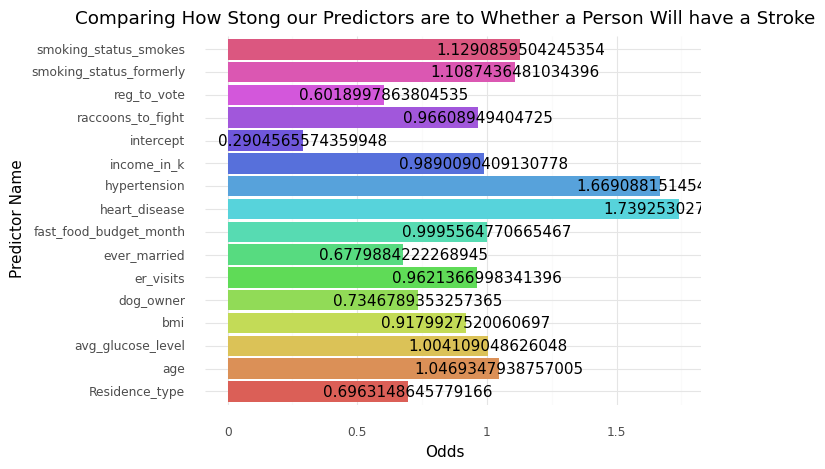

<ggplot: (8767972314669)>

In [111]:
(ggplot(coef,aes(x = "Predictor Name",y = "Odds", fill = "Predictor Name"))+ 
geom_bar(position="dodge",stat="identity") + coord_flip() +stat_summary(fun_data = "mean_sdl",geom = "bar") + 
theme_minimal() + geom_text(aes(label="Odds")) + theme(legend_position = "none") + 
ggtitle("Comparing How Stong our Predictors are to Whether a Person Will have a Stroke"))

### Which of the following variables is the strongest predictor of having a stroke (owning a dog, residence type, marriage, being registered to vote)? How were you able to tell?
The strongest predictor of having a stroke is being a dog owner because it has a higher odds coefficient values. By converting the coefficeint value of this logistic regression model, which was originally in log odds, into odds, we were better able to tell the liklihood of having a stroke dependin g on the predictor variable. This means that as the units of being a dog owner increases by 1, the liklihood of having a stroke as a dog owner is 0.734679 times more likely than depending on the residence type, marriage, or being registered to vote, (which have a liklihood of 0.696315, 0.677988, and 0.601900 times more likely).

## 5. Create a variable `er_visits_per_year` that calculates the # of visits to the ER that a person has had per year of life. Store this variable in your data frame (no need to include this variable in the previous logistic regression model). Is the # of ER visits per year different for stroke and non-stroke patients? How can you tell?

In [65]:
strokesDF["er_visits_per_year"] = (strokesDF["er_visits"]/ strokesDF["age"])

newStrokePredictors = ["age","hypertension", "heart_disease", "ever_married", "Residence_type",
                   "avg_glucose_level", "bmi", "smoking_status_smokes", "smoking_status_formerly", 
                   "reg_to_vote", "dog_owner", "raccoons_to_fight", "fast_food_budget_month", 
                   "income_in_k", "er_visits", "er_visits_per_year"]

strokesDF.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_smokes,smoking_status_formerly,reg_to_vote,dog_owner,raccoons_to_fight,fast_food_budget_month,income_in_k,er_visits,er_visits_per_year
0,60.0,1.0,0.0,0.0,1.0,73.00,25.2,0,1,0,1.0,1.0,10.0,209.19,51.553645,9.0,0.150000
1,4.0,0.0,0.0,0.0,0.0,110.15,17.1,0,0,0,0.0,1.0,13.0,176.46,45.405414,5.0,1.250000
2,77.0,0.0,0.0,1.0,1.0,68.38,27.8,0,0,0,0.0,1.0,6.0,213.00,94.865174,8.0,0.103896
3,37.0,0.0,0.0,1.0,1.0,95.08,30.1,0,0,0,1.0,1.0,12.0,161.90,84.123775,8.0,0.216216
4,44.0,0.0,0.0,0.0,0.0,103.78,40.9,0,1,0,1.0,1.0,11.0,261.29,74.794596,11.0,0.250000


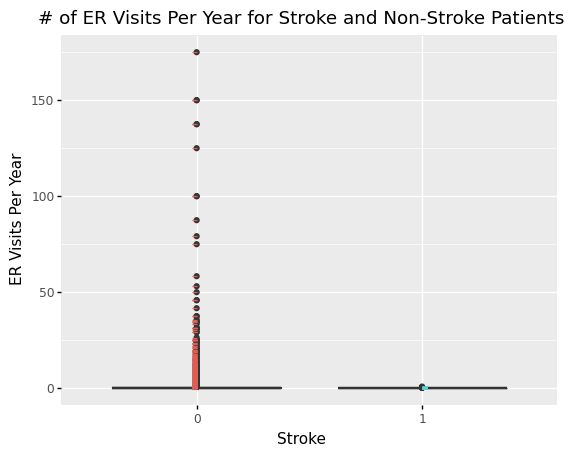

<ggplot: (8767943920433)>

In [99]:
(ggplot(strokesDF, aes(x = "factor(stroke)", y = "er_visits_per_year", fill = "factor(stroke)")) +
geom_boxplot() + theme(legend_position = "none") + xlab("Stroke") + 
ylab("ER Visits Per Year") + geom_point(aes(shape = "stroke")) + 
ggtitle("# of ER Visits Per Year for Stroke and Non-Stroke Patients"))

### Is the # of ER visits per year different for stroke and non-stroke patients? How can you tell?
Yes, it is very different because it seems as though non-stroke patients visit the ER more numbers of times than stroke patients. We can tell by seeing the box plot above, whcih shows us both the stroke and non-stroke patients' number of ER visits they take per year. Since it seems as though non-stroke patients visit the ER more number of times (ranginng from about 0-150 units), compared to stroke patients which is almost 0, we can deduce that non-stroke patients visit the ER more numbers of times than stroke patients.